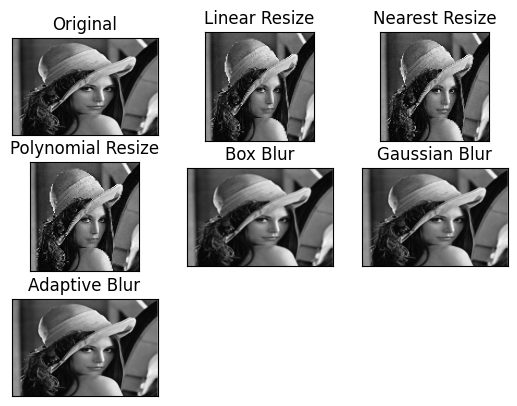

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread("your_image.jpg", cv2.IMREAD_COLOR)

# Resize the image
linear_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
polynomial_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

# Blur the image
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

# Plot results
titles = ['Original', 'Linear Resize', 'Nearest Resize', 'Polynomial Resize',
          'Box Blur', 'Gaussian Blur', 'Adaptive Blur']
images = [image, linear_resized, nearest_resized, polynomial_resized, box_blur, gaussian_blur, adaptive_blur]

for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion Matrix:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 

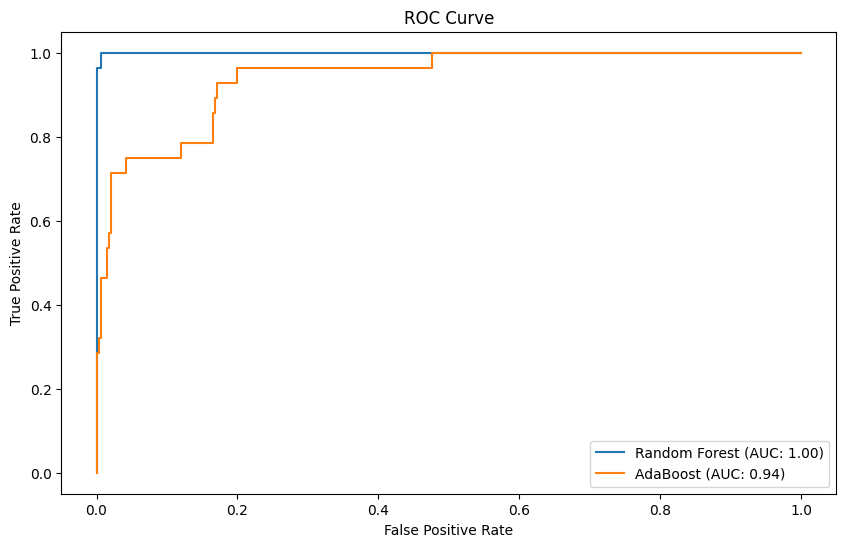

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load MNIST Dataset
digits = load_digits()
X, y = digits.data, digits.target

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
model1 = RandomForestClassifier(random_state=42)
model2 = AdaBoostClassifier(random_state=42)

# Train models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Predict
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Evaluate
print("Random Forest Results:")
print(classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

print("AdaBoost Results:")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# ROC Curve and AUC
y_prob1 = model1.predict_proba(X_test)[:, 1]
y_prob2 = model2.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test == 1, y_prob1)
fpr2, tpr2, _ = roc_curve(y_test == 1, y_prob2)

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label="Random Forest (AUC: {:.2f})".format(roc_auc_score(y_test == 1, y_prob1)))
plt.plot(fpr2, tpr2, label="AdaBoost (AUC: {:.2f})".format(roc_auc_score(y_test == 1, y_prob2)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()